In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# setting environment variable
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [3]:
# Importing the dataset
datafb = pd.read_csv("buddymove_holiday.csv")

## Exploratory Analysis

In [4]:
#display the top rows 
datafb.head()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


In [5]:
#the dataset's detailed information summary
datafb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User Id    249 non-null    object
 1   Sports     249 non-null    int64 
 2   Religious  249 non-null    int64 
 3   Nature     249 non-null    int64 
 4   Theatre    249 non-null    int64 
 5   Shopping   249 non-null    int64 
 6   Picnic     249 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 13.7+ KB


In [6]:
#displays the bottom rows
datafb.tail()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
244,User 245,18,139,148,129,129,168
245,User 246,22,114,228,104,84,168
246,User 247,20,124,178,104,158,174
247,User 248,20,133,149,139,144,213
248,User 249,20,143,149,139,159,143


In [7]:
# check for missing values; output shows no missing values
datafb.isnull().sum()

User Id      0
Sports       0
Religious    0
Nature       0
Theatre      0
Shopping     0
Picnic       0
dtype: int64

In [8]:
#return a tuple containing the number of rows and columns of the DataFrame
datafb.shape

(249, 7)

In [9]:
#the structure of a data frame by performing statistical analysis
datafb.describe()

,Sports,Religious,Nature,Theatre,Shopping,Picnic
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,11.987952,109.779116,124.518072,116.377510,112.638554,120.401606
std,6.616501,32.454115,45.639372,32.132696,41.562888,32.633339
min,2.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,6.000000,84.000000,89.000000,93.000000,79.000000,92.000000
50%,12.000000,104.000000,119.000000,113.000000,104.000000,119.000000
75%,18.000000,132.000000,153.000000,138.000000,138.000000,143.000000
max,25.000000,203.000000,318.000000,213.000000,233.000000,218.000000


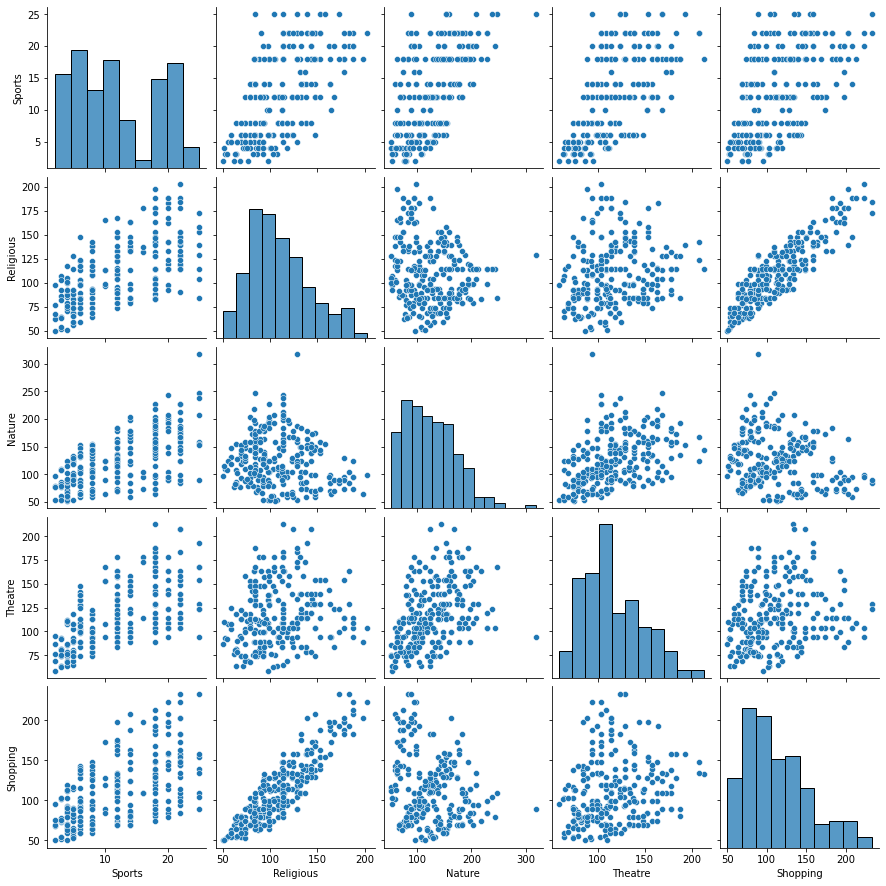

In [10]:
# plotting the dataset details
X = datafb.iloc[:, 1:6]

sns.pairplot(X)

In [11]:
# feature scaling
sc = StandardScaler()
X = sc.fit_transform(X)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

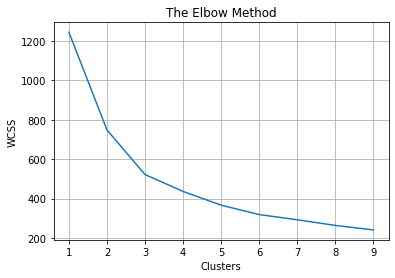

In [12]:
# find the optimal number of clusters with elbow method
WCSS = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1, 10), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


In [13]:
# Fit k-means to dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
#reduce the dimensionality of the data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.53134772, 0.33439809])

In [15]:
sum(pca.explained_variance_ratio_)

0.8657458177136139

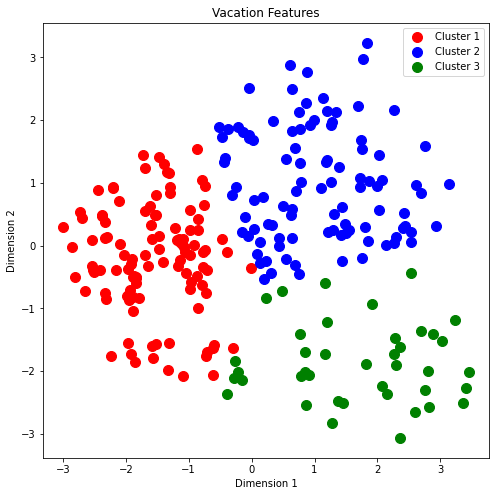

In [16]:
# clusters visualization
colours = ['red', 'blue', 'green']

plt.figure(figsize=(8,8))
for i in range(3):
    plt.scatter(X_reduced[y_kmeans == i, 0], X_reduced[y_kmeans ==i, 1],
               s =100, c = colours[i], label = 'Cluster '+str(i+1))
plt.title('Vacation Features')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

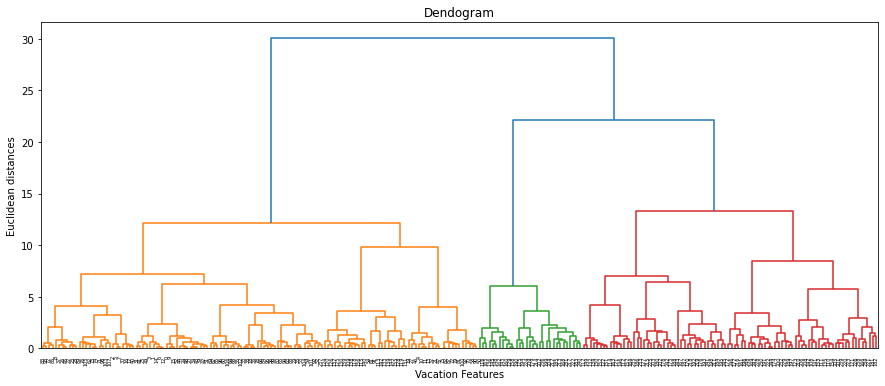

In [17]:
# finding the optimal number of clusters with dendogram
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Vacation Features')
plt.ylabel('Euclidean distances')
plt.show()

In [18]:
# fit the hierarchal cluster to dataset
from sklearn.cluster import AgglomerativeClustering
hc_Vacation = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc_Vacation = hc_Vacation.fit_predict(X)

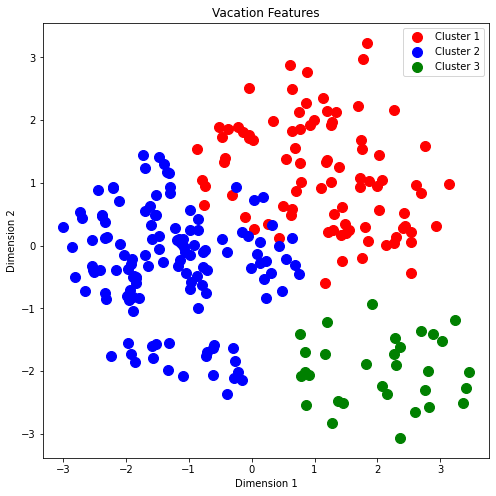

In [19]:
# Visualise clusters
colours = ['red', 'blue', 'green']

plt.figure(figsize=(8,8))
for i in range(3):
    plt.scatter(X_reduced[y_hc_Vacation == i, 0], X_reduced[y_hc_Vacation ==i, 1],
               s =100, c = colours[i], label = 'Cluster '+str(i+1))
plt.title('Vacation Features')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()